## Frequencies of third-person reference in child-directed speech

In this notebook, we briefly take a look at the number of occurances of third-person references v.s. pronoun usage in child-directed speech using the CHILDES corpus.

https://childes.talkbank.org/access/

Whether children utilize third-person references to themselves first due to statistical regularities or a lack of the self-as-\[name\] -concept is an interesting question. Is the usage of "I" in child speech a reliable indicator of forming/being aware of a conscious self, or merely a linguistic epiphenomenon? If a mark of being conscious, what of the child's inner world prior to such linguistic utterances? How do we get from a mess of sensory information into a coherent notion of the 'self'?

### Limitations of current investigation

Firstly, the list of pronouns and third-person references are woefully incomplete. Proper nouns such as names are not extracted from the transcript and accumulated into the frequency counts of the different categories.

Secondly, a timeline progression of changes in these frequencies across child age would be useful to derive insights into when children start to develop such self-as-\[name\] identity.

Thirdly, the frequency count of utterances is merely a first-pass effort in painting a broad stroke of correlation to the question of whether the child is aware of the self, likely this feature would need to be coupled with other behaviors of the child or novel tasks designed to discern the nature of self-concept development in children.

Lastly, such an endeavor would woefully miss out the process of self-concept development in children prior to their language acquisition.

### Potential confounders from Theory of Mind development in children

The cognitive move to resolve a reference from pronoun to subject is one which may implicate reasoning about the existence of other minds. This is often referred to as the Theory of Mind (ToM). In children, this is believed to occur around ages 4 to 7. If pronoun resolution requires such a ToM, then the acquisition of pronouns may strongly correlate with indicators of ToM development. Further investigation into this would be helpful.

In [1]:
!pip install pylangacq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 2.1 MB/s eta 0:00:00


In [2]:
import pylangacq

In [7]:
from google.colab import files
uploaded = files.upload()

Saving Edinburgh.zip to Edinburgh.zip


In [24]:
# Dataset used: https://childes.talkbank.org/access/Eng-UK/Edinburgh.html
all_chats = pylangacq.read_chat("Edinburgh.zip")
print(all_chats.n_files())
all_chats.info()

355
355 files
117443 utterances
564303 words
      Utterance Count    Word Count  File Path
--  -----------------  ------------  ----------------------
#1                 42           106  Edinburgh/adam0901.cha
#2                 40           155  Edinburgh/adam0902.cha
#3                 45           173  Edinburgh/adam0903.cha
#4                206           995  Edinburgh/adam0915.cha
#5                 91           176  Edinburgh/adam0916.cha
...
(set `verbose` to True for all the files)


In [10]:
adam = pylangacq.read_chat("Edinburgh.zip", "adam")
adam.n_files()

13

In [14]:
adam.ages()

[(0, 9, 12),
 (0, 9, 12),
 (0, 9, 12),
 (0, 9, 22),
 (0, 9, 14),
 (0, 9, 23),
 (0, 9, 18),
 (0, 9, 22),
 (0, 9, 29),
 (0, 9, 23),
 (1, 3, 13),
 (1, 3, 13),
 (1, 3, 13)]

In [25]:
word_freq_child = all_chats.word_frequencies(participants="CHI")
word_freq_child.most_common(10)

[('.', 20795),
 ('!', 772),
 ('no', 124),
 ('uhoh', 105),
 ('Mummy', 70),
 ('yeah', 62),
 ('baby', 62),
 ('yes', 61),
 ('Dada', 58),
 ('Daddy', 57)]

In [37]:
cap_list = lambda l: [w.capitalize() for w in l]

PRONOUNS = ["i", "you", "he", "she", "it", "we", "they", "them", "us", "him", "her", "his", "hers", "its", "theirs", "our", "your"]
SELF_REF = ["i", "we", "us", "our"]
MOMMY = ["mommy", "mom", "mummy", "mum", "mother", "mama"]
DADDY = ["daddy", "dad", "father", "dada"]
BABY = ["baby", "baba", "babe", "bobo"]

In [38]:
word_freq_parents = all_chats.word_frequencies(exclude="CHI")
{k:v for k, v in word_freq_parents.items() if k in PRONOUNS + MOMMY + DADDY + BABY + cap_list(PRONOUNS + MOMMY + DADDY + BABY)}

{'you': 20550,
 'I': 4356,
 'your': 5493,
 'it': 8620,
 'Mama': 205,
 'we': 4750,
 'his': 642,
 'Daddy': 726,
 'they': 963,
 'them': 993,
 'Dad': 137,
 'he': 1411,
 'him': 596,
 'Mummy': 1573,
 'Mum': 264,
 'us': 141,
 'our': 231,
 'baby': 799,
 'her': 652,
 'she': 776,
 'mum': 13,
 'Dada': 135,
 'baba': 61,
 'mother': 8,
 'i': 4,
 'its': 45,
 'mummy': 13,
 'babe': 6,
 'hers': 10,
 'father': 4,
 'Mother': 4,
 'Father': 4,
 'mommy': 6,
 'daddy': 7,
 'dad': 6,
 'mama': 2,
 'Baba': 8,
 'It': 1,
 'bobo': 8}

In [33]:
pronoun_freq = sum([v for k, v in word_freq_parents.items() if k in PRONOUNS + cap_list(PRONOUNS)])
pronoun_freq

50234

In [34]:
self_ref_freq = sum([v for k, v in word_freq_parents.items() if k in SELF_REF + cap_list(SELF_REF)])
self_ref_freq

9482

In [39]:
third_person_freq = sum([v for k, v in word_freq_parents.items() if k in MOMMY + DADDY + BABY + cap_list(MOMMY + DADDY + BABY)])
third_person_freq

3989

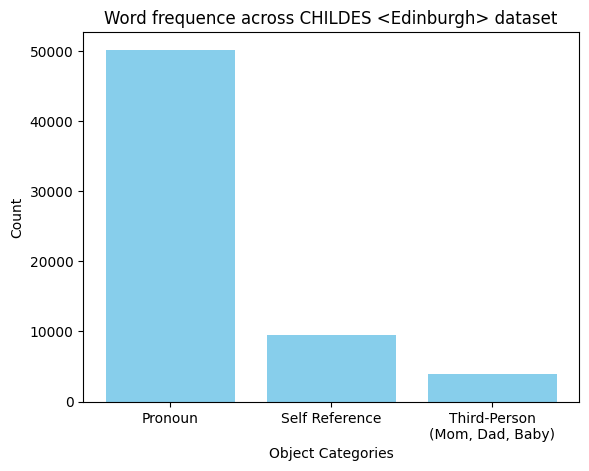

In [43]:
import matplotlib.pyplot as plt

# Data
values = [pronoun_freq, self_ref_freq, third_person_freq]
labels = ['Pronoun', 'Self Reference', 'Third-Person\n(Mom, Dad, Baby)']

# Create the bar chart
plt.bar(labels, values, color='skyblue')

# Add labels and title
plt.xlabel('Object Categories')
plt.ylabel('Count')
plt.title('Word frequence across CHILDES <Edinburgh> dataset')

# Show the plot
plt.show()

### Preliminary results

Looking at the initial results from 1 CHILDES corpus (Edinburgh study with 47 participant children using English language), the frequency of pronoun usage far outstrips that of third-person references.

However, this effect may be skewed due to the lack of third-person reference terms of objects or other people included in the current tabulation.

Limiting the scope of self-referential terms, however, preserves this effect. Third-person references to parents and the child do not exceed that of first-person pronoun usage of "you", "I", "we", etc.